<a href="https://colab.research.google.com/github/higshitani/higshitani.github.io/blob/main/%E6%9D%B1%E8%B0%B7%E7%9B%B4%E5%93%89_PY_DS_2021_ASSIGNMENT_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 考察<br>
<font color="yellow">z軸方向に鳥の位置の差がほとんどない</font>ため、**xy平面上の位置から群れを同定した。**<br>群れを同定するプログラムには、授業中で3番目に紹介されたサンプルコードを活用する。<br>グループの数は、個人的見解による。10つ前後が適当ではないかと思った。

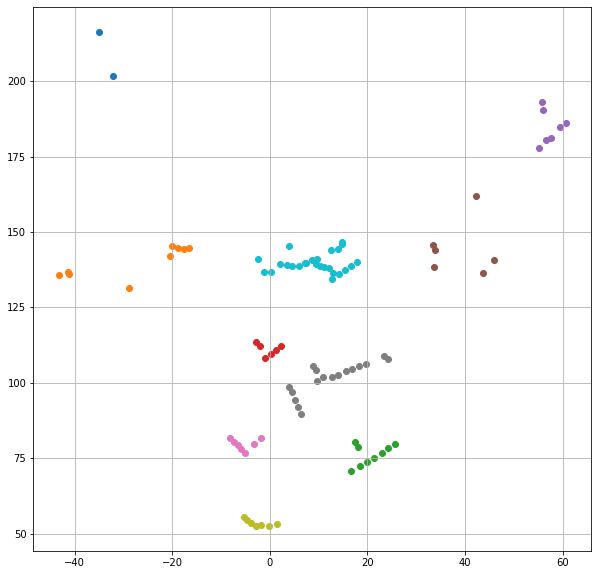

In [6]:
import sys
import numpy as np
import plotly.graph_objects as go
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = np.loadtxt("geese-3d-pos.txt",delimiter=" ")
N = X.shape[0]

fig = go.Figure(
    data=[go.Scatter3d(
            x=X[:,0], y=X[:,1], z=X[:,2],
            mode='markers',
            marker=dict(
                symbol='circle',
                size=3,
                opacity=0.8
                )
            )]
    )

fig.update_layout(
    scene=dict(zaxis = dict(range=[0,60])),
    margin=dict(l=0, r=0, b=0, t=0))
fig.show()



# グループの数
k = 10

# クラスタリング   
km = KMeans(n_clusters=k, init='random')
g = km.fit_predict(X)

# 結果のプロット
cmap = plt.get_cmap("tab10")
for ell in range(k):
    plt.scatter(x[g==ell,0], x[g==ell,1], color=cmap(ell))
plt.grid(True)

plt.rcParams["figure.figsize"] = (10, 11)

plt.show()
